## import libararies


In [23]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style='darkgrid', palette='viridis')
%matplotlib inline

# load dataset


In [2]:
anime=pd.read_csv('anime.csv')
anime

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [3]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
anime['episodes'] = pd.to_numeric(anime['episodes'], errors='coerce')


In [5]:
anime.dropna(subset=['episodes'], inplace=True)


In [6]:
anime.describe()

,anime_id,episodes,rating,members
count,11954.000000,11954.000000,11876.000000,1.195400e+04
mean,13589.705120,12.382550,6.480333,1.836856e+04
std,11209.052798,46.865352,1.021995,5.511078e+04
min,1.000000,1.000000,1.670000,5.000000e+00
25%,3380.250000,1.000000,5.890000,2.290000e+02
50%,9934.500000,2.000000,6.570000,1.579500e+03
75%,23644.500000,12.000000,7.182500,9.755500e+03
max,34527.000000,1818.000000,10.000000,1.013917e+06


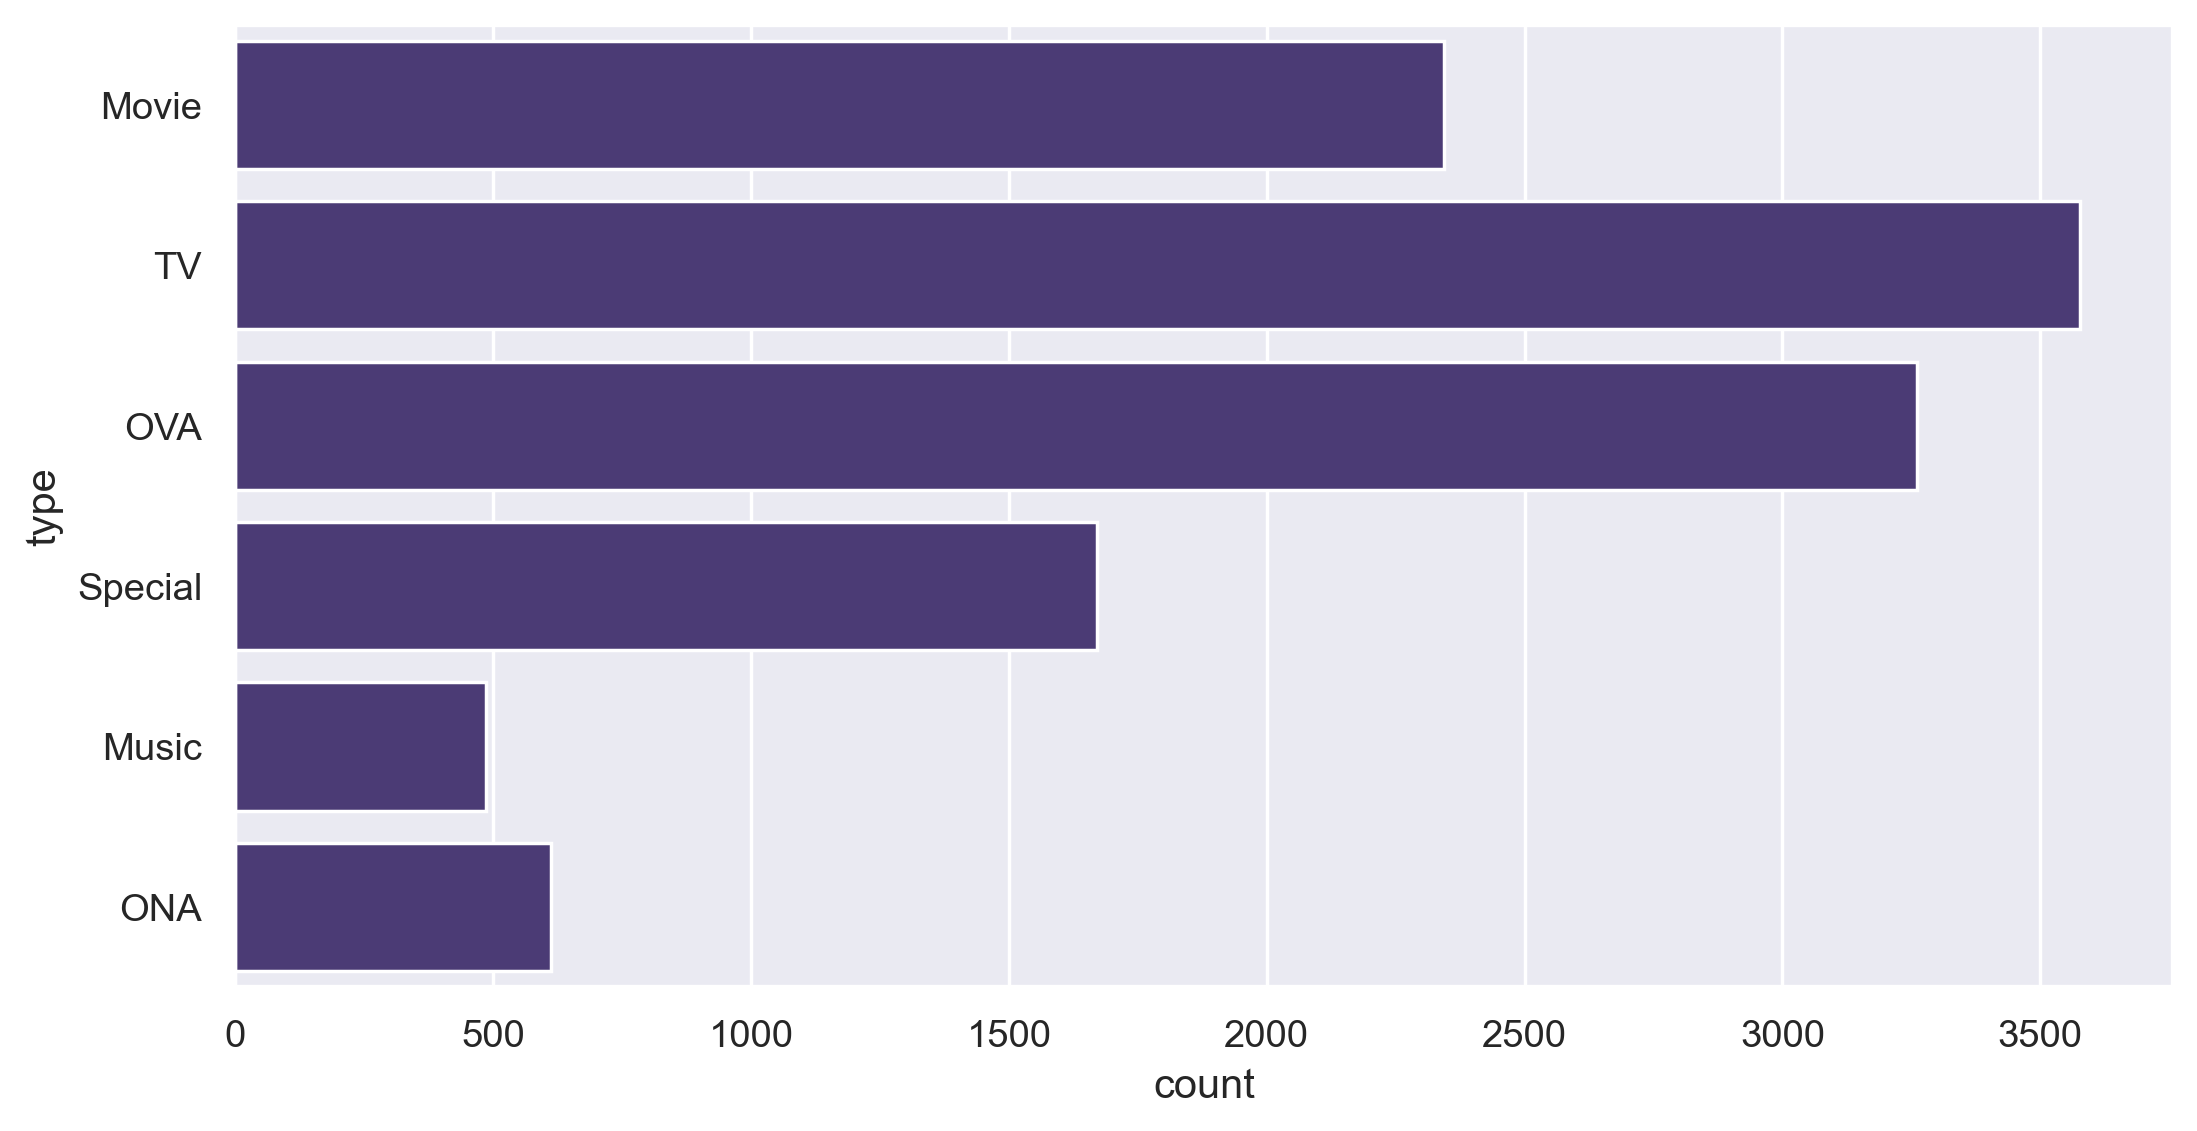

In [7]:
sns.countplot(y = anime['type'])
plt.show()

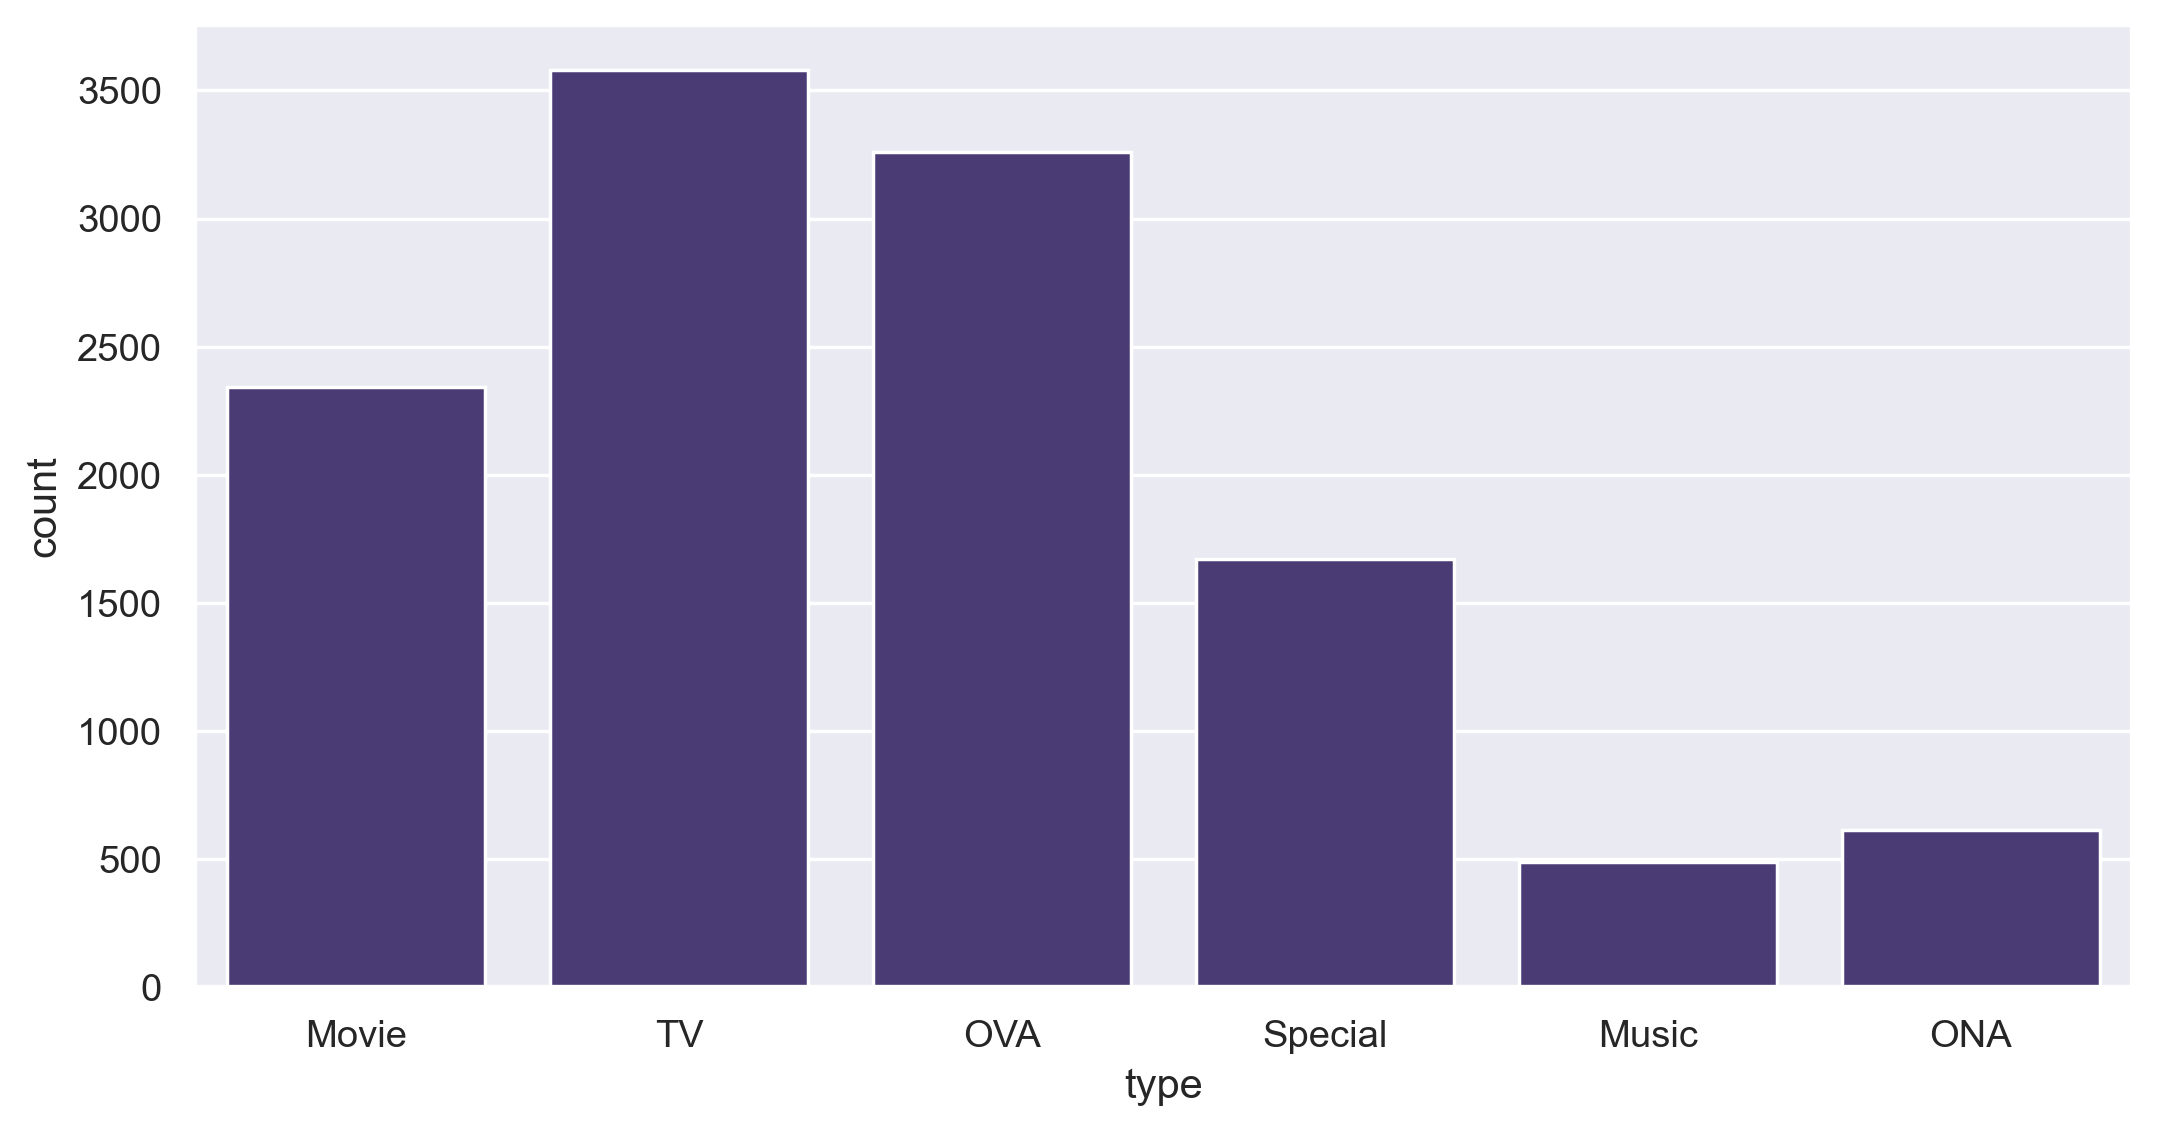

In [8]:
sns.countplot( x=anime['type'])
plt.show()

In [9]:
anime['type'].value_counts()

type
TV         3578
OVA        3261
Movie      2344
Special    1671
ONA         613
Music       487
Name: count, dtype: int64

## Model Building

In [10]:
anime = anime.dropna(subset=['genre'])
anime = anime.drop_duplicates(subset='name')

anime = anime.reset_index(drop=True)

anime['rating'] = anime['rating'].fillna(0)


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(anime['genre'])

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

anime_indices = pd.Series(anime.index, index=anime['name']).to_dict()

In [12]:
anime_indices

{'Kimi no Na wa.': 0,
 'Fullmetal Alchemist: Brotherhood': 1,
 'Gintama°': 2,
 'Steins;Gate': 3,
 'Gintama&#039;': 4,
 'Haikyuu!!: Karasuno Koukou VS Shiratorizawa Gakuen Koukou': 5,
 'Hunter x Hunter (2011)': 6,
 'Ginga Eiyuu Densetsu': 7,
 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare': 8,
 'Gintama&#039;: Enchousen': 9,
 'Clannad: After Story': 10,
 'Koe no Katachi': 11,
 'Gintama': 12,
 'Code Geass: Hangyaku no Lelouch R2': 13,
 'Haikyuu!! Second Season': 14,
 'Sen to Chihiro no Kamikakushi': 15,
 'Shigatsu wa Kimi no Uso': 16,
 'Mushishi Zoku Shou 2nd Season': 17,
 'Ookami Kodomo no Ame to Yuki': 18,
 'Code Geass: Hangyaku no Lelouch': 19,
 'Hajime no Ippo': 20,
 'Rurouni Kenshin: Meiji Kenkaku Romantan - Tsuioku-hen': 21,
 'Cowboy Bebop': 22,
 'One Punch Man': 23,
 'Mononoke Hime': 24,
 'Suzumiya Haruhi no Shoushitsu': 25,
 'Monogatari Series: Second Season': 26,
 'Mushishi Zoku Shou': 27,
 'Mushishi': 28,
 'Tengen Toppa Gurren Lagann': 29,
 'Great Teacher Onizuka': 30,
 '

In [13]:
def recommend_anime(fav_anime, genre_hint=None, top_n=10):
    if fav_anime not in anime_indices:
        return []

    idx = anime_indices[fav_anime]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:]

    anime_indices_similar = [i[0] for i in sim_scores]
    recommendations = anime.iloc[anime_indices_similar]

    if genre_hint:
        recommendations = recommendations[recommendations['genre'].str.contains(genre_hint, case=False, na=False)]

    return recommendations[['name', 'genre', 'rating']].head(top_n)


In [14]:
recommend_anime("Gintama", genre_hint="Action")

,name,genre,rating
4,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",9.16
8,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",9.10
9,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",9.11
12,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",9.04
63,Gintama: Yorinuki Gintama-san on Theater 2D,"Action, Comedy, Historical, Parody, Samurai, S...",8.60
65,Gintama Movie: Shinyaku Benizakura-hen,"Action, Comedy, Historical, Parody, Samurai, S...",8.59
215,Gintama: Shinyaku Benizakura-hen,"Action, Comedy, Historical, Parody, Samurai, S...",8.31
304,Gintama: Jump Festa 2014 Special,"Action, Comedy, Historical, Parody, Samurai, S...",8.20
378,Gintama: Nanigoto mo Saiyo ga Kanjin nano de T...,"Action, Comedy, Historical, Mecha, Parody, Sam...",8.13
359,Gintama: Jump Festa 2015 Special,"Action, Comedy, Historical, Parody, Samurai, S...",8.15


In [15]:
recommend_anime("One Punch Man", genre_hint="Action")

,name,genre,rating
751,One Punch Man Specials,"Action, Comedy, Parody, Sci-Fi, Seinen, Super ...",7.86
767,One Punch Man: Road to Hero,"Action, Comedy, Parody, Sci-Fi, Seinen, Super ...",7.85
555,Gungrave,"Action, Drama, Sci-Fi, Seinen, Super Power",7.97
6948,Ippatsu Hicchuu!! Devander,"Action, Mecha, Parody, Sci-Fi, Super Power",5.80
4760,Tokyo ESP,"Action, Comedy, Sci-Fi, Shounen, Super Power, ...",6.64
10464,Ultraman Graffiti,"Action, Comedy, Parody, Super Power",5.25
10555,Wrestler Gundan Seisenshi Robin Jr.,"Action, Adventure, Comedy, Fantasy, Kids, Paro...",6.32
3454,Kiddy GiRL-AND,"Action, Comedy, Sci-Fi, Super Power",6.98
9428,Mirai Kara Kita Shounen Super Jetter,"Action, Comedy, Sci-Fi, Super Power",5.43
4014,Seikon no Qwaser,"Action, Ecchi, Seinen, Super Power, Supernatural",6.82


In [16]:
recommend_anime("Hellsing Ultimate", genre_hint="Action")

,name,genre,rating
1178,Hellsing,"Action, Horror, Seinen, Supernatural, Vampire",7.64
2032,Hellsing: The Dawn,"Action, Horror, Seinen, Supernatural, Vampire",7.37
745,Hellsing I: Digest for Freaks,"Action, Horror, Military, Seinen, Super Power,...",7.86
2165,Blood-C: The Last Dark,"Action, Horror, Supernatural, Vampire",7.33
843,Blood+,"Action, Drama, Horror, Military, Mystery, Supe...",7.80
2773,Hellsing: Psalm of Darkness,"Action, Seinen, Supernatural, Vampire",7.16
3761,Blood-C: Special Edition,"Action, Horror, School, Supernatural, Vampire",6.88
4366,Blood-C,"Action, Horror, School, Supernatural, Vampire",6.73
2776,Kaibutsu Oujo,"Action, Comedy, Horror, Shounen, Supernatural,...",7.16
2454,Vampire Hunter D,"Action, Horror, Sci-Fi, Supernatural, Vampire",7.26


In [17]:
anime.describe()

,anime_id,episodes,rating,members
count,11901.000000,11901.000000,11901.000000,1.190100e+04
mean,13512.471389,12.428199,6.444929,1.844796e+04
std,11172.899277,46.963605,1.135149,5.522035e+04
min,1.000000,1.000000,0.000000,5.000000e+00
25%,3361.000000,1.000000,5.880000,2.340000e+02
50%,9884.000000,2.000000,6.570000,1.597000e+03
75%,23479.000000,12.000000,7.180000,9.834000e+03
max,34527.000000,1818.000000,10.000000,1.013917e+06


In [18]:
mean_episodes = 12.428199
mean_rating = 6.364471
mean_members = 1.816218e+04

std_dev_episodes = np.std(anime['episodes'])
std_dev_rating = np.std(anime['rating'])
std_dev_members = np.std(anime['members'])

# Set threshold values
episodes_threshold = mean_episodes + std_dev_episodes
rating_threshold = mean_rating + std_dev_rating
members_threshold = mean_members + std_dev_members

print("Threshold values:")
print("Episodes threshold:", episodes_threshold)
print("Rating threshold:", rating_threshold)
print("Members threshold:", members_threshold)

Threshold values:
Episodes threshold: 59.38983048845141
Rating threshold: 7.499572202694371
Members threshold: 73380.20755327099


In [19]:
# Define threshold values for ratings, episodes, and members
rating_threshold =  7.6890472039108655
episodes_threshold = 59.38983048845102
members_threshold = 73109.21807267092

# Create binary target variable based on thresholds
anime['liked'] = ((anime['rating'] >= rating_threshold) |
                         (anime['episodes'] >= episodes_threshold) |
                         (anime['members'] >= members_threshold)).astype(int)

# Display the updated dataset with the new 'liked' column
anime.head()


,anime_id,name,genre,type,episodes,rating,members,liked
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.0,9.37,200630,1
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64.0,9.26,793665,1
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.25,114262,1
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24.0,9.17,673572,1
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.16,151266,1


In [20]:
print(anime['liked'].value_counts())


liked
0    10131
1     1770
Name: count, dtype: int64


In [21]:
from sklearn.model_selection import train_test_split

X = anime.drop(['name', 'type', 'anime_id', 'genre'], axis=1)  # Features
y = anime['liked']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (9520, 4)
Shape of X_test: (2381, 4)
Shape of y_train: (9520,)
Shape of y_test: (2381,)


In [22]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a binary classification model (logistic regression) using the scaled training set
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


## Interview Quetions

## 1) Can you explain the difference between user-based and item-based collaborative filtering?
- User-based and Item-based Collaborative Filtering are two approaches used in recommendation systems to suggest items based on past interactions

1.User-Based Collaborative Filtering How it works: It finds users similar to the target user based on their preferences or behaviors (e.g., ratings or purchases). Recommendations are made by identifying items liked by these similar users.


2.Item-Based Collaborative Filtering How it works: It focuses on the similarity between items rather than users. It identifies items that are frequently liked or purchased together and recommends them to users based on their history

## 2) What is collaborative filtering, and how does it work?

- Collaborative filtering is a recommendation technique used to suggest items (e.g., movies, products) to users based on their past interactions and the preferences of other users. The idea is that people with similar tastes or behaviors will like similar things

1.